In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
df.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [10]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [11]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [13]:
df.describe().corr().T

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.595153,0.551574,-0.656737
Age,-0.595153,1.000000,-0.400019,0.993160
EstimatedSalary,0.551574,-0.400019,1.000000,-0.497715
Purchased,-0.656737,0.993160,-0.497715,1.000000


In [14]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


User ID            1.569154e+07
Age                3.765500e+01
EstimatedSalary    6.974250e+04
Purchased          3.575000e-01
dtype: float64

In [15]:
df.min()

User ID            15566689
Gender               Female
Age                      18
EstimatedSalary       15000
Purchased                 0
dtype: object

In [16]:
df.max()

User ID            15815236
Gender                 Male
Age                      60
EstimatedSalary      150000
Purchased                 1
dtype: object

In [17]:
df=df.drop(['User ID'],axis='columns')

In [18]:
df.head(2)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0


In [19]:
le=LabelEncoder()

In [20]:
df['Gender']=le.fit_transform(df['Gender'])

In [21]:
x=df.drop(['EstimatedSalary'],axis='columns')

In [22]:
y=df.EstimatedSalary.values

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [24]:
li=LinearRegression()

In [25]:
li.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
li.score(xtest,ytest)*100

14.509708691366875

In [33]:
li=LogisticRegression()
li.fit(xtrain,ytrain)
pred_li=li.predict(xtest)
accu_li=accuracy_score(ytest,pred_li)*100
accu_li

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


2.5

In [34]:
print(classification_report(ytest,pred_li))

              precision    recall  f1-score   support

       15000       0.00      0.00      0.00         3
       17000       0.00      0.00      0.00         1
       18000       0.00      0.00      0.00         1
       19000       0.00      0.00      0.00         1
       20000       0.00      0.00      0.00         1
       22000       0.00      0.00      0.00         1
       23000       0.00      0.00      0.00         3
       25000       0.00      0.00      0.00         1
       26000       0.00      0.00      0.00         0
       27000       0.00      0.00      0.00         2
       28000       0.00      0.00      0.00         1
       29000       0.00      0.00      0.00         1
       31000       0.00      0.00      0.00         1
       32000       0.00      0.00      0.00         0
       33000       0.00      0.00      0.00         0
       34000       0.00      0.00      0.00         1
       35000       0.00      0.00      0.00         1
       38000       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest,pred_tre)*100
accu_tre

4.166666666666666

In [36]:
print(classification_report(ytest,pred_tre))

              precision    recall  f1-score   support

       15000       0.00      0.00      0.00         3
       16000       0.00      0.00      0.00         0
       17000       0.00      0.00      0.00         1
       18000       0.33      1.00      0.50         1
       19000       0.00      0.00      0.00         1
       20000       0.00      0.00      0.00         1
       21000       0.00      0.00      0.00         0
       22000       0.00      0.00      0.00         1
       23000       0.00      0.00      0.00         3
       25000       0.00      0.00      0.00         1
       27000       0.00      0.00      0.00         2
       28000       0.10      1.00      0.18         1
       29000       0.00      0.00      0.00         1
       30000       0.00      0.00      0.00         0
       31000       0.00      0.00      0.00         1
       32000       0.00      0.00      0.00         0
       33000       0.00      0.00      0.00         0
       34000       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest,pred_kne)*100
accu_kne

4.166666666666666

In [39]:
print(classification_report(ytest,pred_kne))

              precision    recall  f1-score   support

       15000       0.00      0.00      0.00         3
       16000       0.00      0.00      0.00         0
       17000       0.00      0.00      0.00         1
       18000       0.14      1.00      0.25         1
       19000       0.00      0.00      0.00         1
       20000       0.00      0.00      0.00         1
       21000       0.00      0.00      0.00         0
       22000       0.09      1.00      0.17         1
       23000       0.00      0.00      0.00         3
       25000       0.00      0.00      0.00         1
       26000       0.00      0.00      0.00         0
       27000       0.00      0.00      0.00         2
       28000       0.20      1.00      0.33         1
       29000       0.00      0.00      0.00         1
       30000       0.00      0.00      0.00         0
       31000       0.00      0.00      0.00         1
       33000       0.00      0.00      0.00         0
       34000       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pred_ada)*100
accu_ada

1.6666666666666667

In [42]:
print(classification_report(ytest,pred_ada))

              precision    recall  f1-score   support

       15000       0.00      0.00      0.00         3
       17000       0.00      0.00      0.00         1
       18000       0.00      0.00      0.00         1
       19000       0.00      0.00      0.00         1
       20000       0.00      0.00      0.00         1
       22000       0.00      0.00      0.00         1
       23000       0.00      0.00      0.00         3
       25000       0.00      0.00      0.00         1
       27000       0.00      0.00      0.00         2
       28000       0.00      0.00      0.00         1
       29000       0.00      0.00      0.00         1
       31000       0.00      0.00      0.00         1
       32000       0.00      0.00      0.00         0
       34000       0.00      0.00      0.00         1
       35000       0.00      0.00      0.00         1
       38000       0.00      0.00      0.00         1
       39000       0.00      0.00      0.00         1
       43000       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.ensemble import BaggingClassifier

In [44]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest , pred_bag)*100
accu_bag

4.166666666666666

In [45]:
print(classification_report(ytest,pred_bag))

              precision    recall  f1-score   support

       15000       0.00      0.00      0.00         3
       16000       0.00      0.00      0.00         0
       17000       0.00      0.00      0.00         1
       18000       1.00      1.00      1.00         1
       19000       0.00      0.00      0.00         1
       20000       0.00      0.00      0.00         1
       22000       0.00      0.00      0.00         1
       23000       0.00      0.00      0.00         3
       25000       0.00      0.00      0.00         1
       27000       0.00      0.00      0.00         2
       28000       0.11      1.00      0.20         1
       29000       0.00      0.00      0.00         1
       31000       0.00      0.00      0.00         1
       33000       0.00      0.00      0.00         0
       34000       0.00      0.00      0.00         1
       35000       0.00      0.00      0.00         1
       36000       0.00      0.00      0.00         0
       37000       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pre_gau)*100
accu_l

1.6666666666666667

In [48]:
print(classification_report(ytest,pre_gau))

              precision    recall  f1-score   support

       15000       0.00      0.00      0.00         3
       17000       0.00      0.00      0.00         1
       18000       0.04      1.00      0.08         1
       19000       0.00      0.00      0.00         1
       20000       0.00      0.00      0.00         1
       22000       0.00      0.00      0.00         1
       23000       0.00      0.00      0.00         3
       25000       0.00      0.00      0.00         1
       27000       0.00      0.00      0.00         2
       28000       0.00      0.00      0.00         1
       29000       0.00      0.00      0.00         1
       31000       0.00      0.00      0.00         1
       34000       0.00      0.00      0.00         1
       35000       0.00      0.00      0.00         1
       36000       0.00      0.00      0.00         0
       37000       0.00      0.00      0.00         0
       38000       0.00      0.00      0.00         1
       39000       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
from sklearn.ensemble import ExtraTreesClassifier

In [50]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pre_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pre_etc)*100
accu_etc

4.166666666666666

In [51]:
print(classification_report(ytest,pre_etc))

              precision    recall  f1-score   support

       15000       0.00      0.00      0.00         3
       16000       0.00      0.00      0.00         0
       17000       0.00      0.00      0.00         1
       18000       0.33      1.00      0.50         1
       19000       0.00      0.00      0.00         1
       20000       0.00      0.00      0.00         1
       22000       0.00      0.00      0.00         1
       23000       0.00      0.00      0.00         3
       25000       0.00      0.00      0.00         1
       27000       0.00      0.00      0.00         2
       28000       0.09      1.00      0.17         1
       29000       0.00      0.00      0.00         1
       30000       0.00      0.00      0.00         0
       31000       0.00      0.00      0.00         1
       32000       0.00      0.00      0.00         0
       33000       0.00      0.00      0.00         0
       34000       0.00      0.00      0.00         1
       35000       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
from sklearn.svm import SVC

In [53]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_svc=svc.predict(xtest)
accu_svc=accuracy_score(ytest,pre_svc)*100
accu_svc

1.6666666666666667

In [54]:
print(classification_report(ytest,pre_svc))

              precision    recall  f1-score   support

       15000       0.00      0.00      0.00         3
       17000       0.00      0.00      0.00         1
       18000       0.00      0.00      0.00         1
       19000       0.00      0.00      0.00         1
       20000       0.00      0.00      0.00         1
       22000       0.00      0.00      0.00         1
       23000       0.00      0.00      0.00         3
       25000       0.00      0.00      0.00         1
       27000       0.00      0.00      0.00         2
       28000       0.00      0.00      0.00         1
       29000       0.00      0.00      0.00         1
       31000       0.00      0.00      0.00         1
       34000       0.00      0.00      0.00         1
       35000       0.00      0.00      0.00         1
       38000       0.00      0.00      0.00         1
       39000       0.00      0.00      0.00         1
       42000       0.00      0.00      0.00         0
       43000       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rnd=RandomForestClassifier()
rnd.fit(xtrain,ytrain)
pred_rnd=rnd.predict(xtest)
accu_rnd=accuracy_score(ytest,pred_rnd)*100
accu_rnd

4.166666666666666

In [58]:
print(classification_report(ytest,pred_rnd))

              precision    recall  f1-score   support

       15000       0.00      0.00      0.00         3
       16000       0.00      0.00      0.00         0
       17000       0.00      0.00      0.00         1
       18000       1.00      1.00      1.00         1
       19000       0.00      0.00      0.00         1
       20000       0.00      0.00      0.00         1
       22000       0.00      0.00      0.00         1
       23000       0.00      0.00      0.00         3
       25000       0.00      0.00      0.00         1
       27000       0.00      0.00      0.00         2
       28000       0.11      1.00      0.20         1
       29000       0.00      0.00      0.00         1
       30000       0.00      0.00      0.00         0
       31000       0.00      0.00      0.00         1
       33000       0.00      0.00      0.00         0
       34000       0.00      0.00      0.00         1
       35000       0.00      0.00      0.00         1
       36000       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor

In [60]:
cat1=CatBoostClassifier()
cat1.fit(xtrain,ytrain)

Learning rate set to 0.074153
0:	learn: 4.6577630	total: 586ms	remaining: 9m 45s
1:	learn: 4.6320950	total: 641ms	remaining: 5m 19s
2:	learn: 4.6079456	total: 663ms	remaining: 3m 40s
3:	learn: 4.5827833	total: 685ms	remaining: 2m 50s
4:	learn: 4.5596232	total: 706ms	remaining: 2m 20s
5:	learn: 4.5351312	total: 743ms	remaining: 2m 3s
6:	learn: 4.5113696	total: 779ms	remaining: 1m 50s
7:	learn: 4.4883058	total: 817ms	remaining: 1m 41s
8:	learn: 4.4655079	total: 855ms	remaining: 1m 34s
9:	learn: 4.4426470	total: 877ms	remaining: 1m 26s
10:	learn: 4.4201341	total: 914ms	remaining: 1m 22s
11:	learn: 4.3979223	total: 947ms	remaining: 1m 17s
12:	learn: 4.3757871	total: 974ms	remaining: 1m 13s
13:	learn: 4.3556298	total: 993ms	remaining: 1m 9s
14:	learn: 4.3375565	total: 1.01s	remaining: 1m 6s
15:	learn: 4.3158232	total: 1.04s	remaining: 1m 4s
16:	learn: 4.2953899	total: 1.06s	remaining: 1m 1s
17:	learn: 4.2846174	total: 1.07s	remaining: 58.2s
18:	learn: 4.2706766	total: 1.08s	remaining: 55.8s

160:	learn: 2.9028792	total: 6.5s	remaining: 33.9s
161:	learn: 2.8970273	total: 6.56s	remaining: 33.9s
162:	learn: 2.8928991	total: 6.6s	remaining: 33.9s
163:	learn: 2.8881944	total: 6.64s	remaining: 33.9s
164:	learn: 2.8812995	total: 6.69s	remaining: 33.9s
165:	learn: 2.8782542	total: 6.73s	remaining: 33.8s
166:	learn: 2.8730147	total: 6.78s	remaining: 33.8s
167:	learn: 2.8690911	total: 6.82s	remaining: 33.8s
168:	learn: 2.8643523	total: 6.86s	remaining: 33.7s
169:	learn: 2.8584804	total: 6.91s	remaining: 33.7s
170:	learn: 2.8532557	total: 6.95s	remaining: 33.7s
171:	learn: 2.8469300	total: 7s	remaining: 33.7s
172:	learn: 2.8429752	total: 7.05s	remaining: 33.7s
173:	learn: 2.8374455	total: 7.1s	remaining: 33.7s
174:	learn: 2.8341834	total: 7.14s	remaining: 33.6s
175:	learn: 2.8298992	total: 7.18s	remaining: 33.6s
176:	learn: 2.8250390	total: 7.22s	remaining: 33.6s
177:	learn: 2.8214138	total: 7.27s	remaining: 33.6s
178:	learn: 2.8170662	total: 7.32s	remaining: 33.6s
179:	learn: 2.8142

319:	learn: 2.3369336	total: 13.2s	remaining: 28.1s
320:	learn: 2.3331341	total: 13.3s	remaining: 28.1s
321:	learn: 2.3307132	total: 13.3s	remaining: 28s
322:	learn: 2.3289528	total: 13.3s	remaining: 27.9s
323:	learn: 2.3267915	total: 13.4s	remaining: 27.9s
324:	learn: 2.3240255	total: 13.4s	remaining: 27.8s
325:	learn: 2.3204736	total: 13.4s	remaining: 27.8s
326:	learn: 2.3190653	total: 13.5s	remaining: 27.7s
327:	learn: 2.3152261	total: 13.5s	remaining: 27.7s
328:	learn: 2.3129248	total: 13.6s	remaining: 27.6s
329:	learn: 2.3106385	total: 13.6s	remaining: 27.6s
330:	learn: 2.3085673	total: 13.6s	remaining: 27.5s
331:	learn: 2.3058877	total: 13.7s	remaining: 27.5s
332:	learn: 2.3034239	total: 13.7s	remaining: 27.4s
333:	learn: 2.3015669	total: 13.7s	remaining: 27.4s
334:	learn: 2.2999432	total: 13.8s	remaining: 27.4s
335:	learn: 2.2978450	total: 13.8s	remaining: 27.3s
336:	learn: 2.2949756	total: 13.9s	remaining: 27.3s
337:	learn: 2.2929347	total: 13.9s	remaining: 27.2s
338:	learn: 2.

479:	learn: 2.0146731	total: 20.3s	remaining: 22s
480:	learn: 2.0133063	total: 20.4s	remaining: 22s
481:	learn: 2.0111780	total: 20.4s	remaining: 22s
482:	learn: 2.0091310	total: 20.5s	remaining: 21.9s
483:	learn: 2.0073555	total: 20.5s	remaining: 21.9s
484:	learn: 2.0057838	total: 20.6s	remaining: 21.8s
485:	learn: 2.0042995	total: 20.6s	remaining: 21.8s
486:	learn: 2.0029526	total: 20.7s	remaining: 21.8s
487:	learn: 2.0015975	total: 20.7s	remaining: 21.7s
488:	learn: 1.9997674	total: 20.8s	remaining: 21.7s
489:	learn: 1.9983937	total: 20.8s	remaining: 21.7s
490:	learn: 1.9964381	total: 20.9s	remaining: 21.6s
491:	learn: 1.9946864	total: 20.9s	remaining: 21.6s
492:	learn: 1.9934729	total: 21s	remaining: 21.6s
493:	learn: 1.9917743	total: 21s	remaining: 21.5s
494:	learn: 1.9900490	total: 21.1s	remaining: 21.5s
495:	learn: 1.9878353	total: 21.1s	remaining: 21.5s
496:	learn: 1.9865567	total: 21.2s	remaining: 21.4s
497:	learn: 1.9845761	total: 21.2s	remaining: 21.4s
498:	learn: 1.9829281	

638:	learn: 1.8055618	total: 27.8s	remaining: 15.7s
639:	learn: 1.8044074	total: 27.8s	remaining: 15.7s
640:	learn: 1.8032717	total: 27.9s	remaining: 15.6s
641:	learn: 1.8024218	total: 27.9s	remaining: 15.6s
642:	learn: 1.8012331	total: 28s	remaining: 15.6s
643:	learn: 1.8005186	total: 28.1s	remaining: 15.5s
644:	learn: 1.7993436	total: 28.1s	remaining: 15.5s
645:	learn: 1.7982560	total: 28.1s	remaining: 15.4s
646:	learn: 1.7969957	total: 28.2s	remaining: 15.4s
647:	learn: 1.7964172	total: 28.2s	remaining: 15.3s
648:	learn: 1.7953628	total: 28.3s	remaining: 15.3s
649:	learn: 1.7943773	total: 28.3s	remaining: 15.2s
650:	learn: 1.7932616	total: 28.3s	remaining: 15.2s
651:	learn: 1.7921139	total: 28.4s	remaining: 15.1s
652:	learn: 1.7908741	total: 28.4s	remaining: 15.1s
653:	learn: 1.7898967	total: 28.4s	remaining: 15s
654:	learn: 1.7889095	total: 28.5s	remaining: 15s
655:	learn: 1.7881298	total: 28.5s	remaining: 15s
656:	learn: 1.7873327	total: 28.6s	remaining: 14.9s
657:	learn: 1.786281

800:	learn: 1.6645862	total: 34.9s	remaining: 8.66s
801:	learn: 1.6638964	total: 34.9s	remaining: 8.62s
802:	learn: 1.6631182	total: 35s	remaining: 8.57s
803:	learn: 1.6622446	total: 35s	remaining: 8.53s
804:	learn: 1.6616275	total: 35s	remaining: 8.49s
805:	learn: 1.6610757	total: 35.1s	remaining: 8.44s
806:	learn: 1.6601937	total: 35.1s	remaining: 8.4s
807:	learn: 1.6593863	total: 35.1s	remaining: 8.35s
808:	learn: 1.6586712	total: 35.2s	remaining: 8.31s
809:	learn: 1.6579434	total: 35.2s	remaining: 8.26s
810:	learn: 1.6571362	total: 35.3s	remaining: 8.21s
811:	learn: 1.6563376	total: 35.3s	remaining: 8.17s
812:	learn: 1.6558171	total: 35.3s	remaining: 8.13s
813:	learn: 1.6551680	total: 35.4s	remaining: 8.08s
814:	learn: 1.6543951	total: 35.4s	remaining: 8.04s
815:	learn: 1.6536543	total: 35.4s	remaining: 7.99s
816:	learn: 1.6529515	total: 35.5s	remaining: 7.95s
817:	learn: 1.6521490	total: 35.5s	remaining: 7.9s
818:	learn: 1.6515818	total: 35.6s	remaining: 7.86s
819:	learn: 1.651030

963:	learn: 1.5703836	total: 40.8s	remaining: 1.52s
964:	learn: 1.5697408	total: 40.8s	remaining: 1.48s
965:	learn: 1.5694078	total: 40.8s	remaining: 1.44s
966:	learn: 1.5687766	total: 40.9s	remaining: 1.39s
967:	learn: 1.5681564	total: 40.9s	remaining: 1.35s
968:	learn: 1.5677914	total: 40.9s	remaining: 1.31s
969:	learn: 1.5671889	total: 41s	remaining: 1.27s
970:	learn: 1.5665615	total: 41s	remaining: 1.22s
971:	learn: 1.5659637	total: 41.1s	remaining: 1.18s
972:	learn: 1.5653863	total: 41.1s	remaining: 1.14s
973:	learn: 1.5650331	total: 41.1s	remaining: 1.1s
974:	learn: 1.5644314	total: 41.2s	remaining: 1.05s
975:	learn: 1.5638213	total: 41.2s	remaining: 1.01s
976:	learn: 1.5632815	total: 41.2s	remaining: 971ms
977:	learn: 1.5628697	total: 41.3s	remaining: 929ms
978:	learn: 1.5624047	total: 41.3s	remaining: 886ms
979:	learn: 1.5619632	total: 41.3s	remaining: 844ms
980:	learn: 1.5615271	total: 41.4s	remaining: 802ms
981:	learn: 1.5610060	total: 41.4s	remaining: 759ms
982:	learn: 1.560

In [62]:
cat1.score(xtest,ytest)*100

5.0

In [63]:
cat2=CatBoostRegressor()
cat2.fit(xtrain,ytrain)

Learning rate set to 0.031117
0:	learn: 34771.6428939	total: 42.1ms	remaining: 42.1s
1:	learn: 34480.9515698	total: 43.7ms	remaining: 21.8s
2:	learn: 34270.1025640	total: 44.8ms	remaining: 14.9s
3:	learn: 34001.9270495	total: 46.4ms	remaining: 11.5s
4:	learn: 33741.7862474	total: 48.1ms	remaining: 9.57s
5:	learn: 33535.1407203	total: 49.7ms	remaining: 8.24s
6:	learn: 33369.1403437	total: 50.4ms	remaining: 7.15s
7:	learn: 33151.4897888	total: 51.5ms	remaining: 6.38s
8:	learn: 32978.7466918	total: 52.3ms	remaining: 5.76s
9:	learn: 32785.2717443	total: 54.3ms	remaining: 5.37s
10:	learn: 32631.2230035	total: 54.9ms	remaining: 4.94s
11:	learn: 32497.2713060	total: 55.6ms	remaining: 4.58s
12:	learn: 32354.1426654	total: 56.2ms	remaining: 4.26s
13:	learn: 32140.2366943	total: 57ms	remaining: 4.01s
14:	learn: 31986.4374954	total: 57.6ms	remaining: 3.78s
15:	learn: 31845.2482420	total: 58.9ms	remaining: 3.62s
16:	learn: 31681.2875731	total: 59.5ms	remaining: 3.44s
17:	learn: 31558.9437088	total

197:	learn: 26654.8932912	total: 186ms	remaining: 753ms
198:	learn: 26652.3874025	total: 186ms	remaining: 750ms
199:	learn: 26641.0025154	total: 187ms	remaining: 748ms
200:	learn: 26632.4074083	total: 188ms	remaining: 747ms
201:	learn: 26621.2622064	total: 189ms	remaining: 745ms
202:	learn: 26618.2564084	total: 189ms	remaining: 743ms
203:	learn: 26614.8757992	total: 190ms	remaining: 741ms
204:	learn: 26602.1642191	total: 191ms	remaining: 740ms
205:	learn: 26589.8332988	total: 191ms	remaining: 737ms
206:	learn: 26575.3561531	total: 192ms	remaining: 736ms
207:	learn: 26565.1954869	total: 193ms	remaining: 734ms
208:	learn: 26558.5196827	total: 193ms	remaining: 732ms
209:	learn: 26538.9260803	total: 194ms	remaining: 730ms
210:	learn: 26536.2565413	total: 195ms	remaining: 728ms
211:	learn: 26522.4275222	total: 195ms	remaining: 726ms
212:	learn: 26501.7839555	total: 196ms	remaining: 725ms
213:	learn: 26493.6001520	total: 197ms	remaining: 723ms
214:	learn: 26477.2307519	total: 198ms	remaining

359:	learn: 24912.8528339	total: 318ms	remaining: 565ms
360:	learn: 24909.2254032	total: 319ms	remaining: 564ms
361:	learn: 24900.1025137	total: 319ms	remaining: 563ms
362:	learn: 24890.1367577	total: 320ms	remaining: 562ms
363:	learn: 24887.2489312	total: 321ms	remaining: 561ms
364:	learn: 24875.3266268	total: 322ms	remaining: 560ms
365:	learn: 24865.8803745	total: 323ms	remaining: 560ms
366:	learn: 24862.3881188	total: 324ms	remaining: 559ms
367:	learn: 24858.8229206	total: 325ms	remaining: 558ms
368:	learn: 24854.8688415	total: 326ms	remaining: 557ms
369:	learn: 24851.0305470	total: 326ms	remaining: 556ms
370:	learn: 24841.8333628	total: 327ms	remaining: 555ms
371:	learn: 24825.6398039	total: 328ms	remaining: 554ms
372:	learn: 24816.3897781	total: 329ms	remaining: 553ms
373:	learn: 24813.6995313	total: 330ms	remaining: 552ms
374:	learn: 24802.5519976	total: 330ms	remaining: 551ms
375:	learn: 24793.6180367	total: 331ms	remaining: 550ms
376:	learn: 24784.3115857	total: 332ms	remaining

539:	learn: 23720.2056384	total: 458ms	remaining: 390ms
540:	learn: 23712.2887073	total: 459ms	remaining: 389ms
541:	learn: 23708.9622878	total: 460ms	remaining: 388ms
542:	learn: 23700.5922143	total: 461ms	remaining: 388ms
543:	learn: 23692.9840807	total: 461ms	remaining: 387ms
544:	learn: 23689.6873118	total: 462ms	remaining: 386ms
545:	learn: 23687.6306466	total: 463ms	remaining: 385ms
546:	learn: 23681.4972278	total: 463ms	remaining: 384ms
547:	learn: 23675.0607346	total: 464ms	remaining: 383ms
548:	learn: 23668.9945577	total: 465ms	remaining: 382ms
549:	learn: 23664.9375694	total: 466ms	remaining: 381ms
550:	learn: 23659.7547136	total: 466ms	remaining: 380ms
551:	learn: 23655.5956725	total: 467ms	remaining: 379ms
552:	learn: 23652.4476416	total: 468ms	remaining: 378ms
553:	learn: 23645.4053287	total: 468ms	remaining: 377ms
554:	learn: 23640.2409030	total: 469ms	remaining: 376ms
555:	learn: 23637.1310002	total: 470ms	remaining: 375ms
556:	learn: 23631.1602397	total: 471ms	remaining

712:	learn: 23088.8350792	total: 597ms	remaining: 240ms
713:	learn: 23086.3456266	total: 598ms	remaining: 239ms
714:	learn: 23083.8369025	total: 599ms	remaining: 239ms
715:	learn: 23081.5937976	total: 600ms	remaining: 238ms
716:	learn: 23080.7513982	total: 601ms	remaining: 237ms
717:	learn: 23079.4749830	total: 601ms	remaining: 236ms
718:	learn: 23078.3941416	total: 602ms	remaining: 235ms
719:	learn: 23075.7345663	total: 603ms	remaining: 234ms
720:	learn: 23071.0091391	total: 604ms	remaining: 234ms
721:	learn: 23069.2012926	total: 604ms	remaining: 233ms
722:	learn: 23063.7905852	total: 605ms	remaining: 232ms
723:	learn: 23062.7967078	total: 606ms	remaining: 231ms
724:	learn: 23060.8970116	total: 606ms	remaining: 230ms
725:	learn: 23058.7242663	total: 607ms	remaining: 229ms
726:	learn: 23054.5953868	total: 608ms	remaining: 228ms
727:	learn: 23051.4278070	total: 609ms	remaining: 227ms
728:	learn: 23049.1290748	total: 609ms	remaining: 226ms
729:	learn: 23045.8570966	total: 610ms	remaining

884:	learn: 22678.0863716	total: 732ms	remaining: 95.1ms
885:	learn: 22676.5847702	total: 733ms	remaining: 94.3ms
886:	learn: 22675.9631159	total: 734ms	remaining: 93.5ms
887:	learn: 22675.3548313	total: 735ms	remaining: 92.7ms
888:	learn: 22674.8866490	total: 735ms	remaining: 91.8ms
889:	learn: 22672.5088920	total: 736ms	remaining: 91ms
890:	learn: 22670.6123207	total: 737ms	remaining: 90.2ms
891:	learn: 22669.1070008	total: 738ms	remaining: 89.3ms
892:	learn: 22668.3953854	total: 738ms	remaining: 88.5ms
893:	learn: 22667.8331826	total: 739ms	remaining: 87.6ms
894:	learn: 22666.9934555	total: 740ms	remaining: 86.8ms
895:	learn: 22665.5298264	total: 741ms	remaining: 86ms
896:	learn: 22664.6383037	total: 741ms	remaining: 85.1ms
897:	learn: 22663.0556547	total: 742ms	remaining: 84.3ms
898:	learn: 22661.4249612	total: 743ms	remaining: 83.5ms
899:	learn: 22659.9831193	total: 744ms	remaining: 82.7ms
900:	learn: 22658.8957855	total: 745ms	remaining: 81.8ms
901:	learn: 22656.7334599	total: 74

In [64]:
cat2.score(xtest,ytest)*100

-34.56195534237929

In [65]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier' , 
             'AdaBoostClassifier','BaggingClassifier','GaussianNB','AdaBoostClassifier','ExtraTreesClassifier','SVM','RandomForestClassifier'],
    'Score': [accu_li,accu_tre, accu_kne, accu_ada,accu_bag,accu_l,accu_ada,accu_etc,accu_svc,accu_rnd]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,DecisionTreeClassifier,4.166667
2,KNeighborsClassifier,4.166667
4,BaggingClassifier,4.166667
7,ExtraTreesClassifier,4.166667
9,RandomForestClassifier,4.166667
0,LogisticRegression,2.500000
3,AdaBoostClassifier,1.666667
5,GaussianNB,1.666667
6,AdaBoostClassifier,1.666667
8,SVM,1.666667


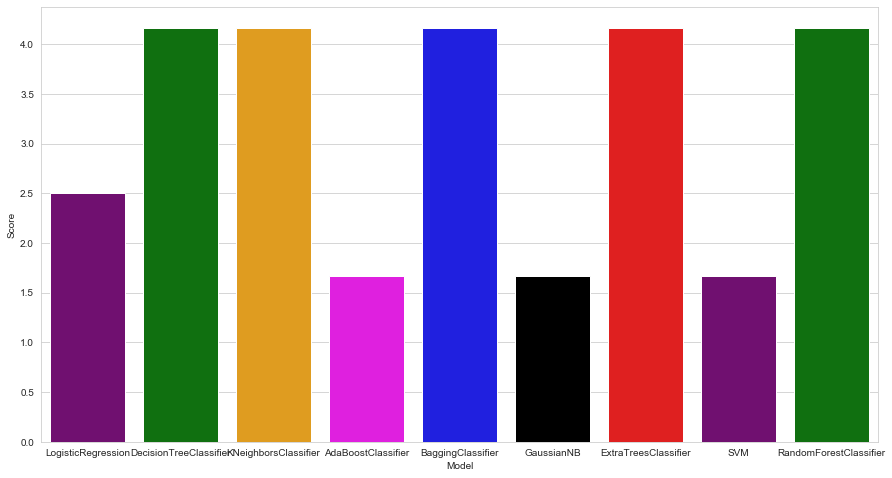

In [70]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [71]:
df.head(2)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0


In [72]:
import sklearn.cluster as cluster

In [73]:
kmns=cluster.KMeans(n_clusters=5)

In [75]:
kmns=kmns.fit(df[['Gender','EstimatedSalary']])

In [76]:
kmns.cluster_centers_

array([[5.40322581e-01, 7.90887097e+04],
       [4.82758621e-01, 2.68735632e+04],
       [3.95348837e-01, 1.09046512e+05],
       [3.68421053e-01, 1.38394737e+05],
       [5.18518519e-01, 5.37407407e+04]])

In [77]:
df['Gender by EstimatedSalary']=kmns.labels_

In [78]:
from sklearn.cluster import KMeans 

In [79]:
k_range=range(1,15)
wss=[]

In [80]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Gender','EstimatedSalary']])
    wss.append(km.inertia_)

In [81]:
wss

[463878477599.96,
 165344554063.8067,
 59489922525.42621,
 33459707508.140522,
 19983360152.410698,
 14673820718.883587,
 10082004183.584156,
 8062116046.391526,
 6355005341.699769,
 5207280763.726191,
 4272460293.592556,
 3236351237.3492,
 2794305152.517942,
 2463501515.2098393]

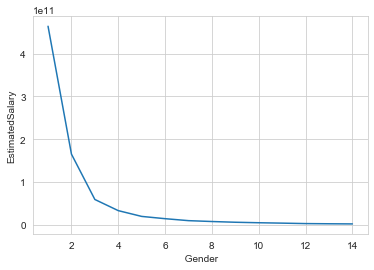

In [82]:
plt.xlabel(' Gender')
plt.ylabel('EstimatedSalary')
plt.plot(k_range,wss)

In [83]:
kmns=cluster.KMeans(n_clusters=5)

In [84]:
kmns=kmns.fit(df[['Age','EstimatedSalary']])

In [85]:
kmns.cluster_centers_

array([[4.17209302e+01, 1.09046512e+05],
       [3.68888889e+01, 5.37407407e+04],
       [3.53306452e+01, 7.90887097e+04],
       [3.72643678e+01, 2.68735632e+04],
       [4.37105263e+01, 1.38394737e+05]])

In [86]:
df['Age by EstimatedSalary']=kmns.labels_

In [87]:
k_range=range(1,15)
wss=[]

In [88]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','EstimatedSalary']])
    wss.append(km.inertia_)

In [89]:
wss

[463878521346.39,
 165263007019.02875,
 59521270263.77738,
 33459749146.525543,
 19983401049.300743,
 14696724905.42726,
 10128318629.556316,
 8090686461.256174,
 6346017569.492352,
 5212275797.230873,
 4201212466.4114466,
 3205197913.689892,
 2837664897.073082,
 2443962473.0435715]

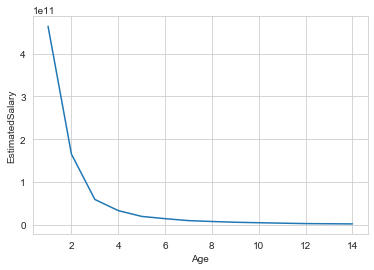

In [90]:
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.plot(k_range,wss)

In [91]:
df.head()

,Gender,Age,EstimatedSalary,Purchased,Gender by EstimatedSalary,Age by EstimatedSalary
0,1,19,19000,0,1,3
1,1,35,20000,0,1,3
2,0,26,43000,0,4,1
3,0,27,57000,0,4,1
4,1,19,76000,0,0,2


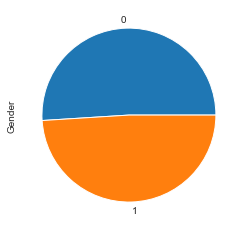

In [92]:
df.Gender.value_counts().plot(kind='pie')

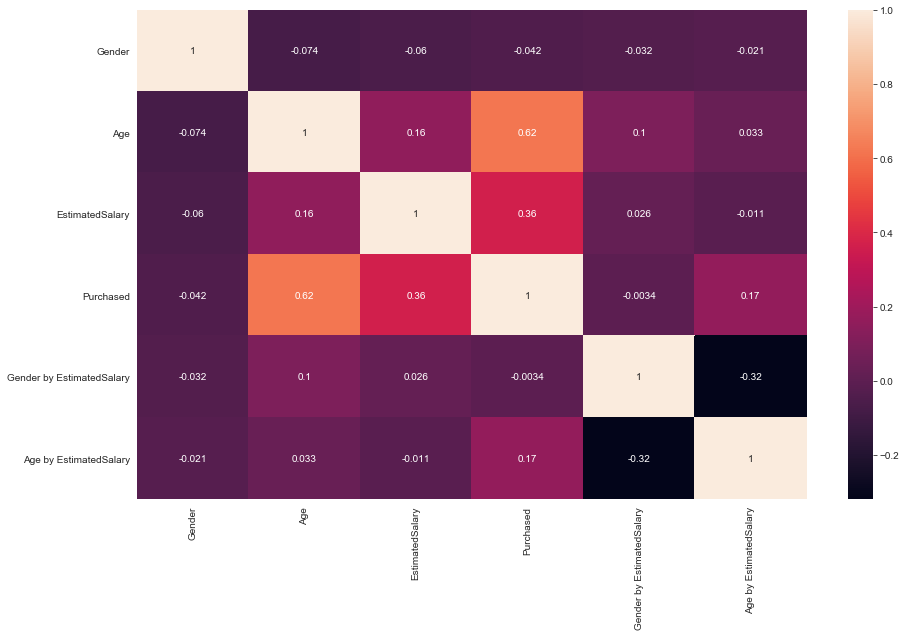

In [93]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

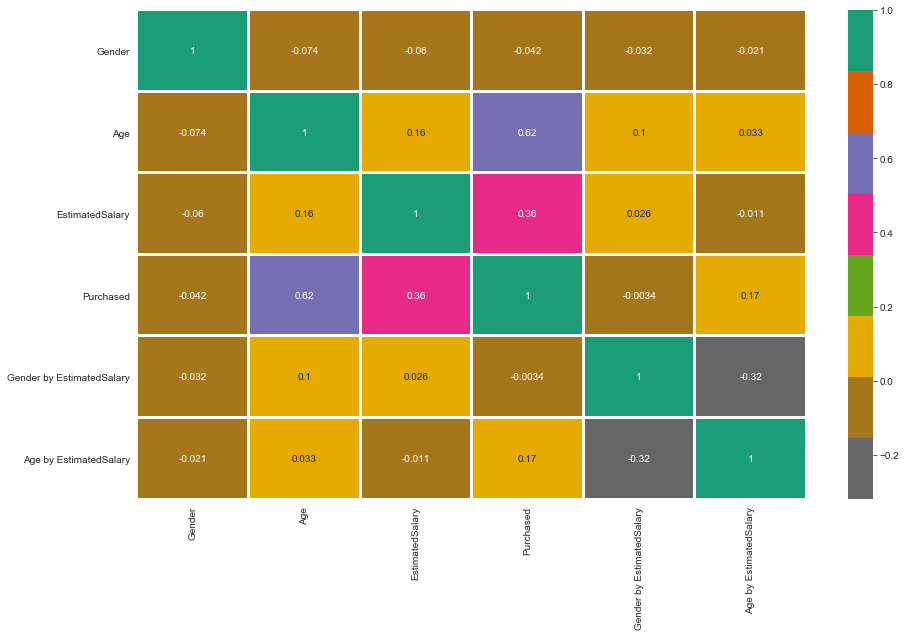

In [94]:
plt.figure(figsize=(15,9))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

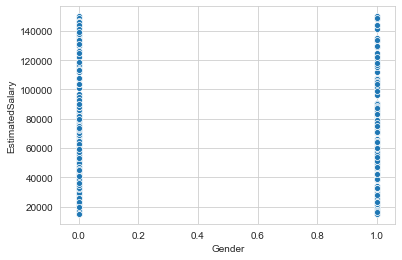

In [96]:
sns.scatterplot(x='Gender',y='EstimatedSalary',data=df)

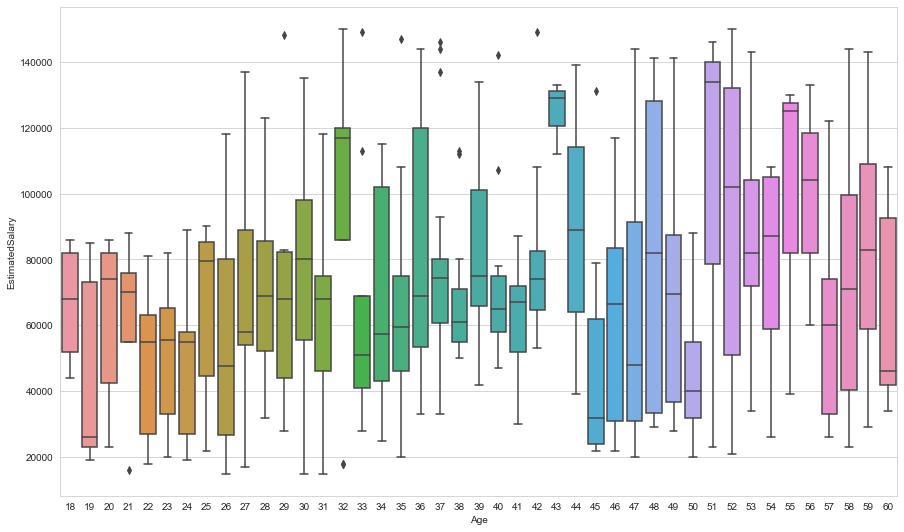

In [98]:
plt.figure(figsize=(15,9))
sns.boxplot(x='Age',y='EstimatedSalary',data=df)

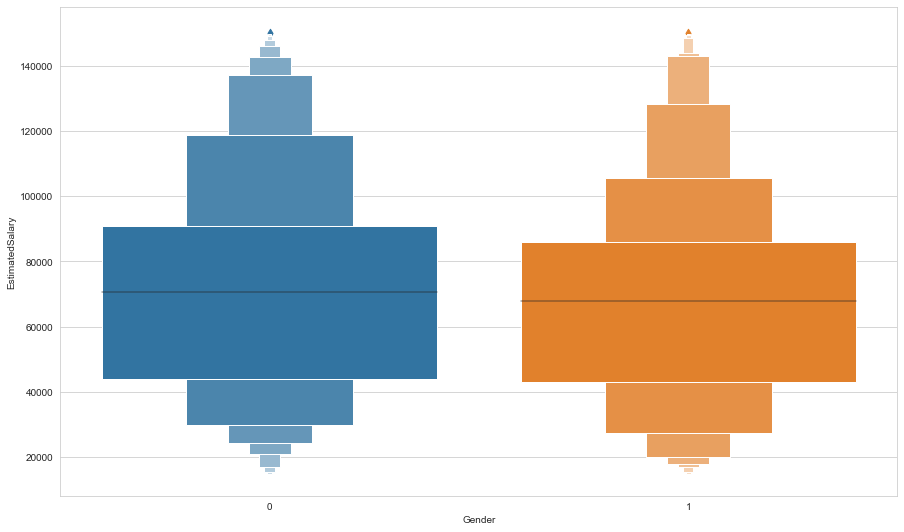

In [99]:
plt.figure(figsize=(15,9))
sns.boxenplot(x='Gender',y='EstimatedSalary',data=df)

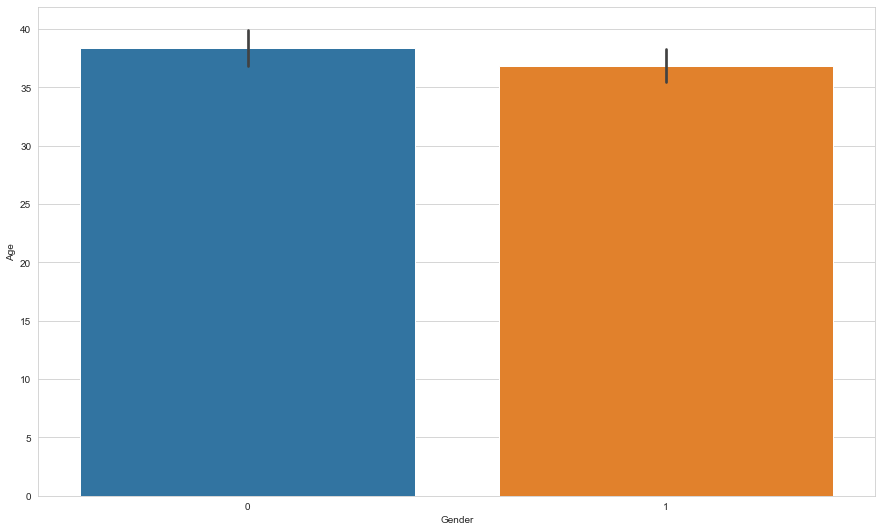

In [100]:
plt.figure(figsize=(15,9))
sns.barplot(x='Gender',y='Age',data=df)

In [101]:
df.head(2)

,Gender,Age,EstimatedSalary,Purchased,Gender by EstimatedSalary,Age by EstimatedSalary
0,1,19,19000,0,1,3
1,1,35,20000,0,1,3


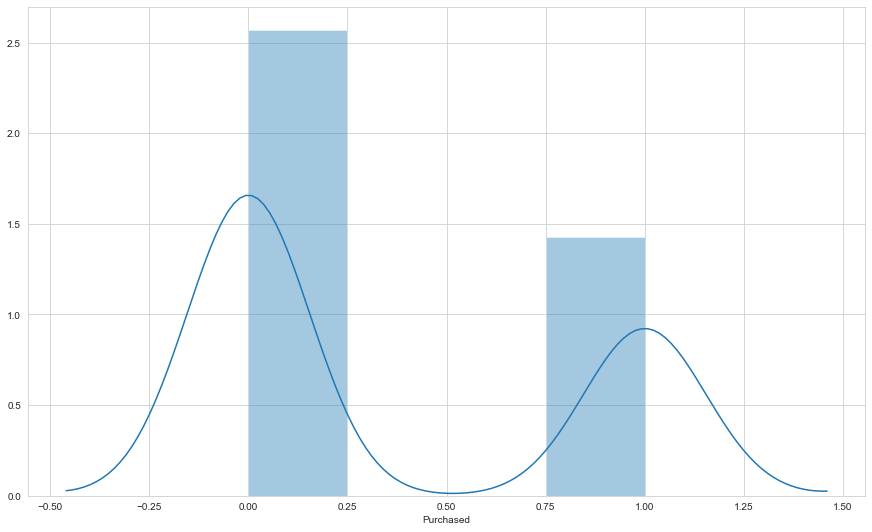

In [102]:
plt.figure(figsize=(15,9))
sns.distplot(df['Purchased'])

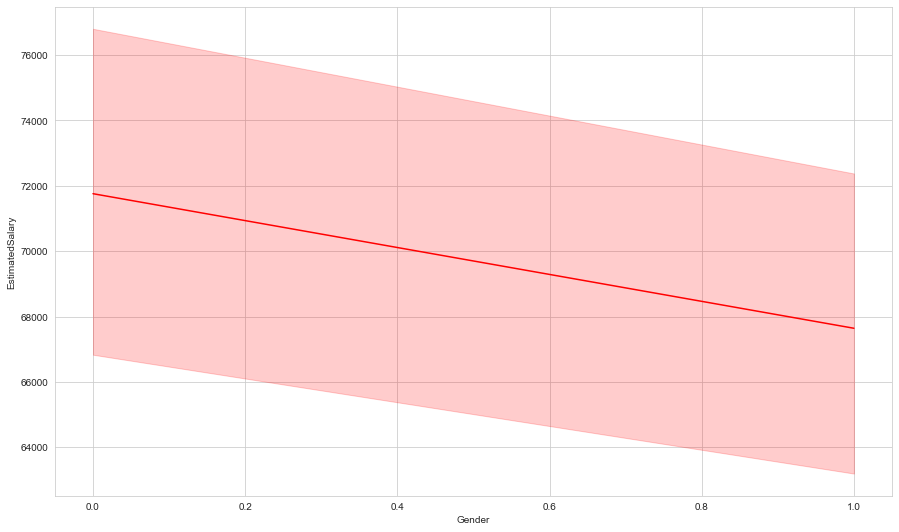

In [103]:
plt.figure(figsize=(15,9))
sns.lineplot(x='Gender',y='EstimatedSalary',data=df,color='red')

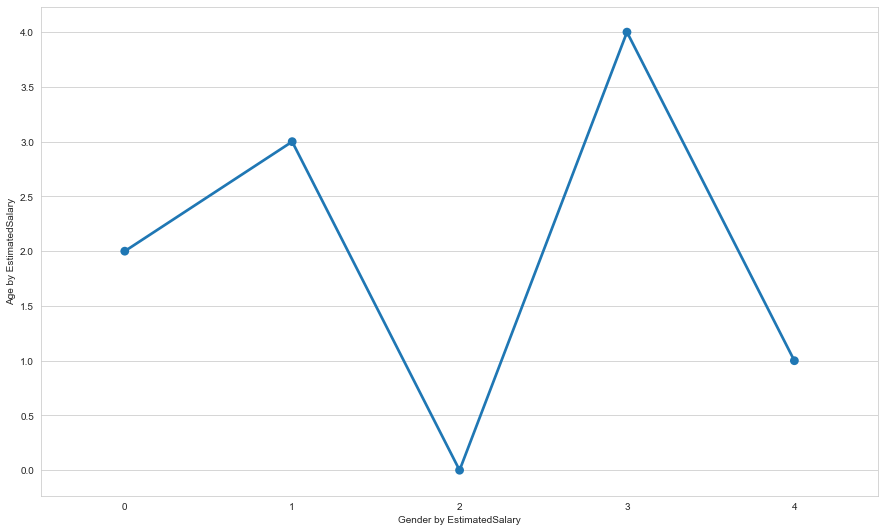

In [104]:
plt.figure(figsize=(15,9))
sns.pointplot(x='Gender by EstimatedSalary',y='Age by EstimatedSalary',data=df)

<Figure size 1080x648 with 0 Axes>

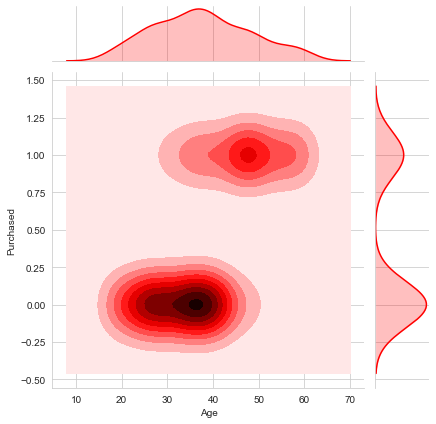

In [105]:
plt.figure(figsize=(15,9))
sns.jointplot(x='Age',y='Purchased',data=df,kind='kde',color='red')

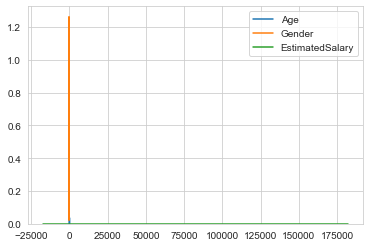

In [106]:
sns.kdeplot(df['Age'])
sns.kdeplot(df['Gender'])
sns.kdeplot(df['EstimatedSalary'])

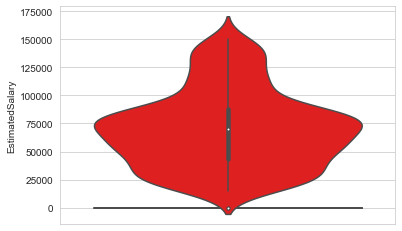

In [107]:
sns.violinplot(y="Age",data=df)
sns.violinplot(y="Gender",data=df,color='orange')
sns.violinplot(y="EstimatedSalary",data=df,color='red')

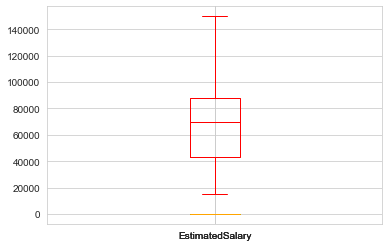

In [108]:
df.boxplot(column="Age")
df.boxplot(column="Gender",color='orange')
df.boxplot(column="EstimatedSalary",color='red')

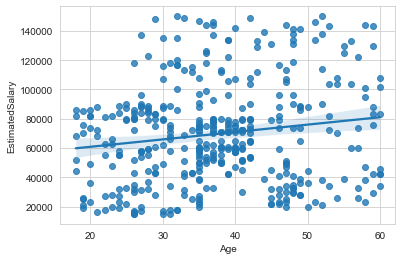

In [109]:
sns.regplot(x=df["Age"], y=df["EstimatedSalary"], 
data=df)

In [110]:
import sweetviz as sv

In [111]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [113]:
from IPython.display import IFrame

In [114]:
IFrame(src='Analyze.html',width=1000,height=600)

In [115]:
df.head(2)

,Gender,Age,EstimatedSalary,Purchased,Gender by EstimatedSalary,Age by EstimatedSalary
0,1,19,19000,0,1,3
1,1,35,20000,0,1,3


In [116]:
col=['Gender','Age','EstimatedSalary','Purchased']
for x in col:
    print('{}:{}'.format(x.upper(),df[x].unique()))

GENDER:[1 0]
AGE:[19 35 26 27 32 25 20 18 29 47 45 46 48 49 31 21 28 33 30 23 24 22 59 34
 39 38 37 42 40 36 41 58 55 52 60 56 53 50 51 57 44 43 54]
ESTIMATEDSALARY:[ 19000  20000  43000  57000  76000  58000  84000 150000  33000  65000
  80000  52000  86000  18000  82000  25000  26000  28000  29000  22000
  49000  41000  23000  30000  74000 137000  16000  44000  90000  27000
  72000  31000  17000  51000 108000  15000  79000  54000 135000  89000
  32000  83000  55000  48000 117000  87000  66000 120000  63000  68000
 113000 112000  42000  88000  62000 118000  85000  81000  50000 116000
 123000  73000  37000  59000 149000  21000  35000  71000  61000  75000
  53000 107000  96000  45000  47000 100000  38000  69000 148000 115000
  34000  60000  70000  36000  39000 134000 101000 130000 114000 142000
  78000 143000  91000 144000 102000 126000 133000 147000 104000 146000
 122000  97000  95000 131000  77000 125000 106000 141000  93000 138000
 119000 105000  99000 129000  46000  64000 139000]
PUR

In [117]:
for i in df.columns:
    print(i,len([df[i]==0]))

Gender 1
Age 1
EstimatedSalary 1
Purchased 1
Gender by EstimatedSalary 1
Age by EstimatedSalary 1


EstimatedSalary  15000   16000   17000   18000   19000   20000   21000   \
Gender                                                                    
0                     2       1       2       0       0       1       2   
1                     2       1       1       4       2       4       0   

EstimatedSalary  22000   23000   25000   ...  139000  141000  142000  143000  \
Gender                                   ...                                   
0                     2       3       2  ...       1       1       1       1   
1                     3       4       2  ...       0       1       0       1   

EstimatedSalary  144000  146000  147000  148000  149000  150000  
Gender                                                           
0                     1       2       1       0       1       1  
1                     3       0       0       1       1       1  

[2 rows x 117 columns]


Text(0.5, 1.0, 'GENDER by EstimatedSalary ')

<Figure size 1000x1000 with 0 Axes>

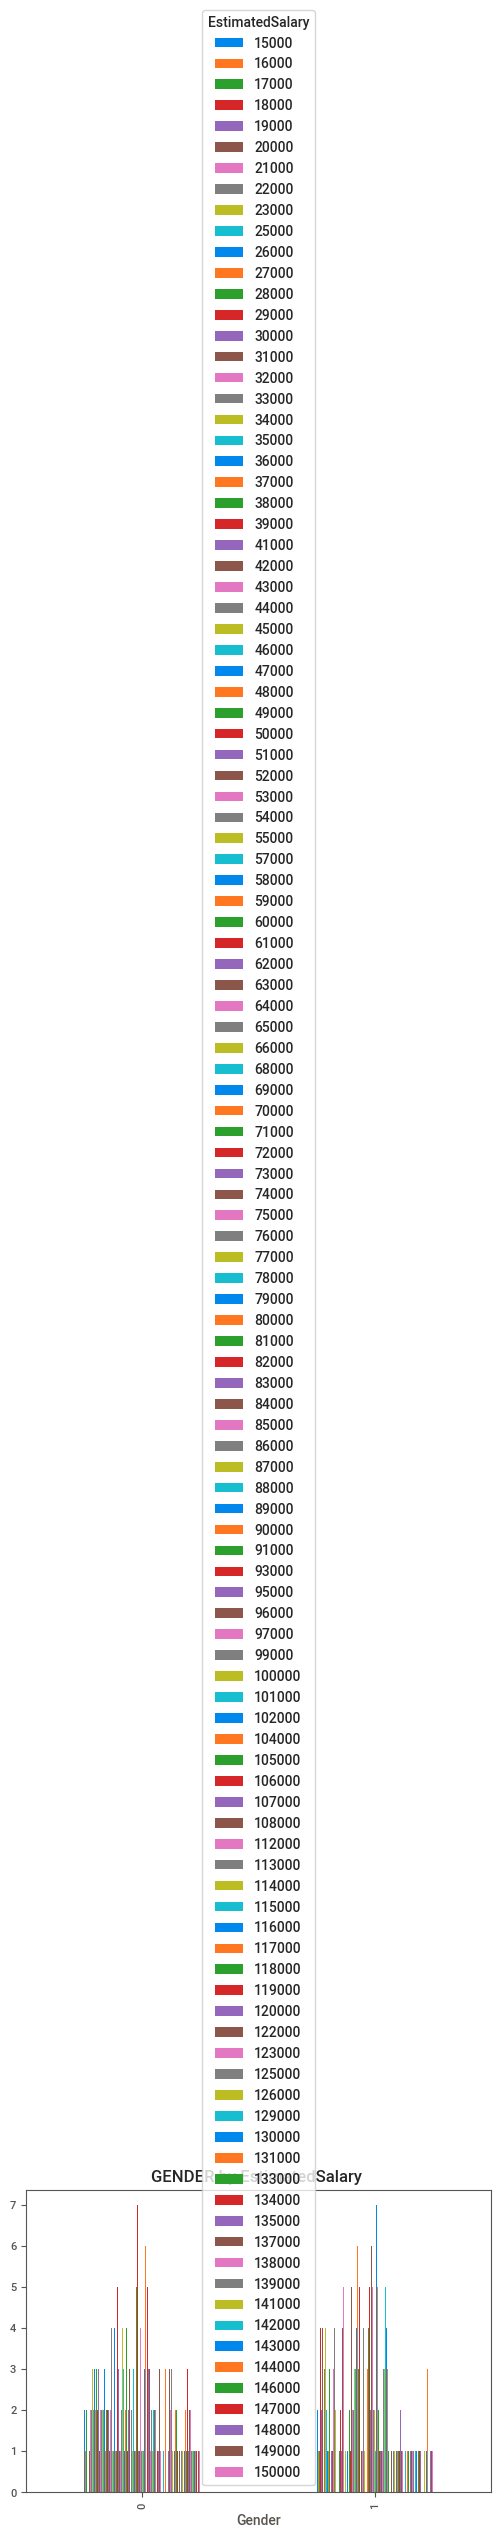

In [122]:
plt.figure(figsize=(10,10))
gender_EstimatedSalary=pd.crosstab(df['Gender'],df['EstimatedSalary'] )
print(gender_EstimatedSalary)

ax=gender_EstimatedSalary.plot(kind='bar')
plt.title("GENDER by EstimatedSalary ")

EstimatedSalary  15000   16000   17000   18000   19000   20000   21000   \
Age                                                                       
18                    0       0       0       0       0       0       0   
19                    0       0       0       0       1       0       1   
20                    0       0       0       0       0       0       0   
21                    0       1       0       0       0       0       0   
22                    0       0       0       1       0       0       0   
23                    0       0       0       0       0       1       0   
24                    0       0       0       0       1       0       0   
25                    0       0       0       0       0       0       0   
26                    2       1       1       0       0       0       0   
27                    0       0       1       0       0       1       0   
28                    0       0       0       0       0       0       0   
29                    0  

Text(0.5, 1.0, 'Age by EstimatedSalary ')

<Figure size 1000x1000 with 0 Axes>

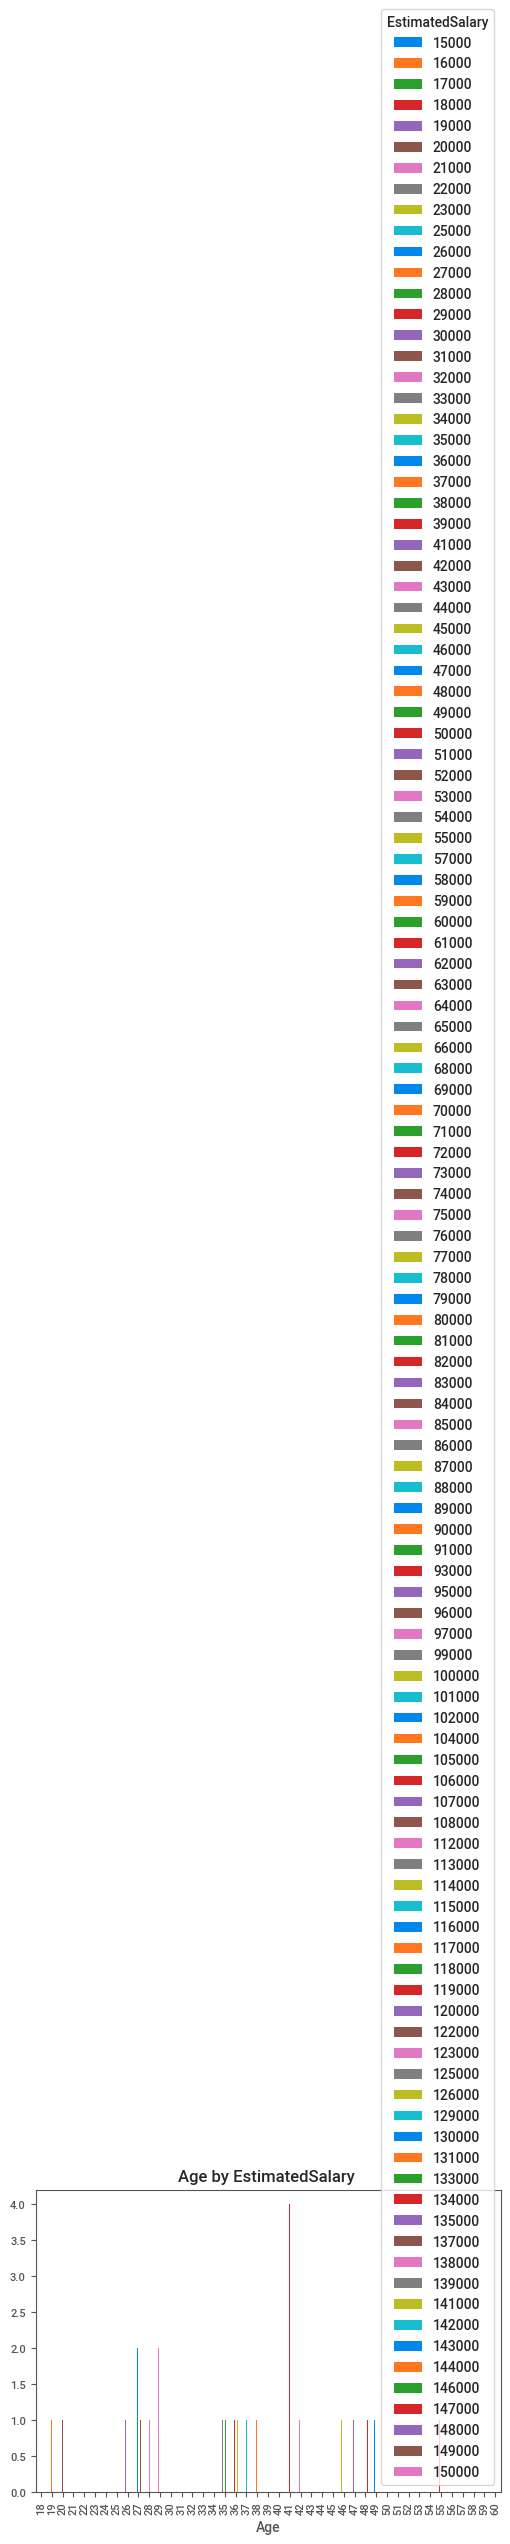

In [123]:
plt.figure(figsize=(10,10))
age_EstimatedSalary=pd.crosstab(df['Age'],df['EstimatedSalary'] )
print(age_EstimatedSalary)

ax=age_EstimatedSalary.plot(kind='bar')
plt.title("Age by EstimatedSalary ")

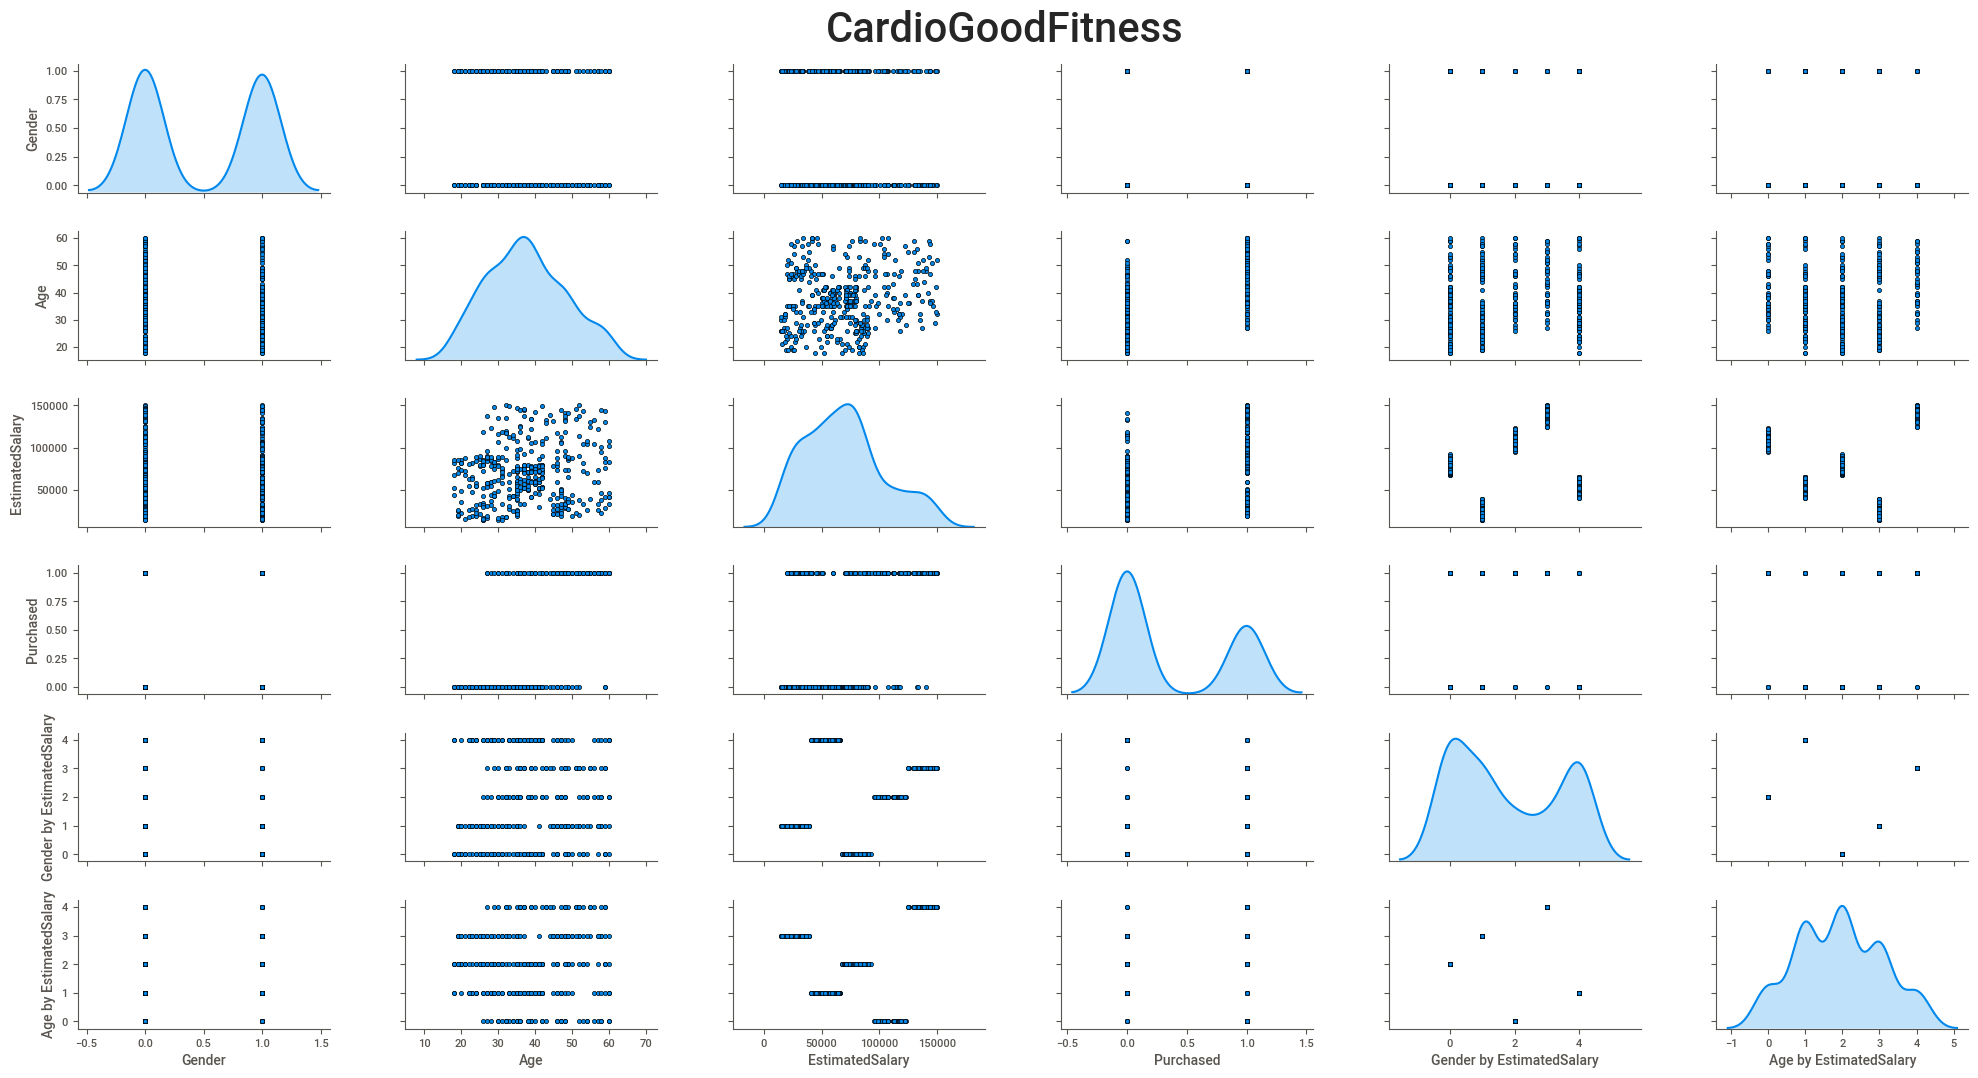

In [124]:
pp = sns.pairplot(df, height=1.8, aspect=1.8, plot_kws=dict(edgecolor="k", linewidth=0.5), diag_kind="kde", diag_kws=dict(shade=True))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('CardioGoodFitness', fontsize=30)

In [125]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [126]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased',
       'Gender by EstimatedSalary', 'Age by EstimatedSalary'],
      dtype='object')

In [127]:
man=MinMaxScaler()
feat=['Gender', 'Age', 'EstimatedSalary', 'Purchased']
df[feat]=man.fit_transform(df[feat])
df[feat]

,Gender,Age,EstimatedSalary,Purchased
0,1.0,0.023810,0.029630,0.0
1,1.0,0.404762,0.037037,0.0
2,0.0,0.190476,0.207407,0.0
3,0.0,0.214286,0.311111,0.0
4,1.0,0.023810,0.451852,0.0
...,...,...,...,...
395,0.0,0.666667,0.192593,1.0
396,1.0,0.785714,0.059259,1.0
397,0.0,0.761905,0.037037,1.0
398,1.0,0.428571,0.133333,0.0


In [128]:
std=StandardScaler()
feat=['Gender', 'Age', 'EstimatedSalary', 'Purchased']
df[feat]=std.fit_transform(df[feat])
df[feat]

,Gender,Age,EstimatedSalary,Purchased
0,1.020204,-1.781797,-1.490046,-0.745936
1,1.020204,-0.253587,-1.460681,-0.745936
2,-0.980196,-1.113206,-0.785290,-0.745936
3,-0.980196,-1.017692,-0.374182,-0.745936
4,1.020204,-1.781797,0.183751,-0.745936
...,...,...,...,...
395,-0.980196,0.797057,-0.844019,1.340598
396,1.020204,1.274623,-1.372587,1.340598
397,-0.980196,1.179110,-1.460681,1.340598
398,1.020204,-0.158074,-1.078938,-0.745936
